<a href="https://colab.research.google.com/github/moorthynair/Air-Quality-Assessment/blob/main/COLAB/Air_Quality_Summary_information_for_PRANA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Colab Notebbok is to support city stakeholders to assess air quality information to be filled in Portal for Regulation on Air pollution in Non-Attianment Cities (PRANA) developed by Minstry of Environment Forest and Climate Change (MoEFCC)**


---


**Input to the notebook**


 1. Air Quality data in excel format

 2. Initial paramters including Start date of analysis; End date of analysis and city name to be inputed 


**Input 1 - Let's Begin with downloading the Air Quality data**


*   Air Quality information downaloded from CPCB portal. The procedure to download the data is as follows: -                                  
  Click on the link (https://app.cpcbccr.com/ccr/#/caaqm-dashboard-all/caaqm-landing) --> Enter the captcha --> click on 'Comparision data'
  
  **I hope you are viewing the below interface**
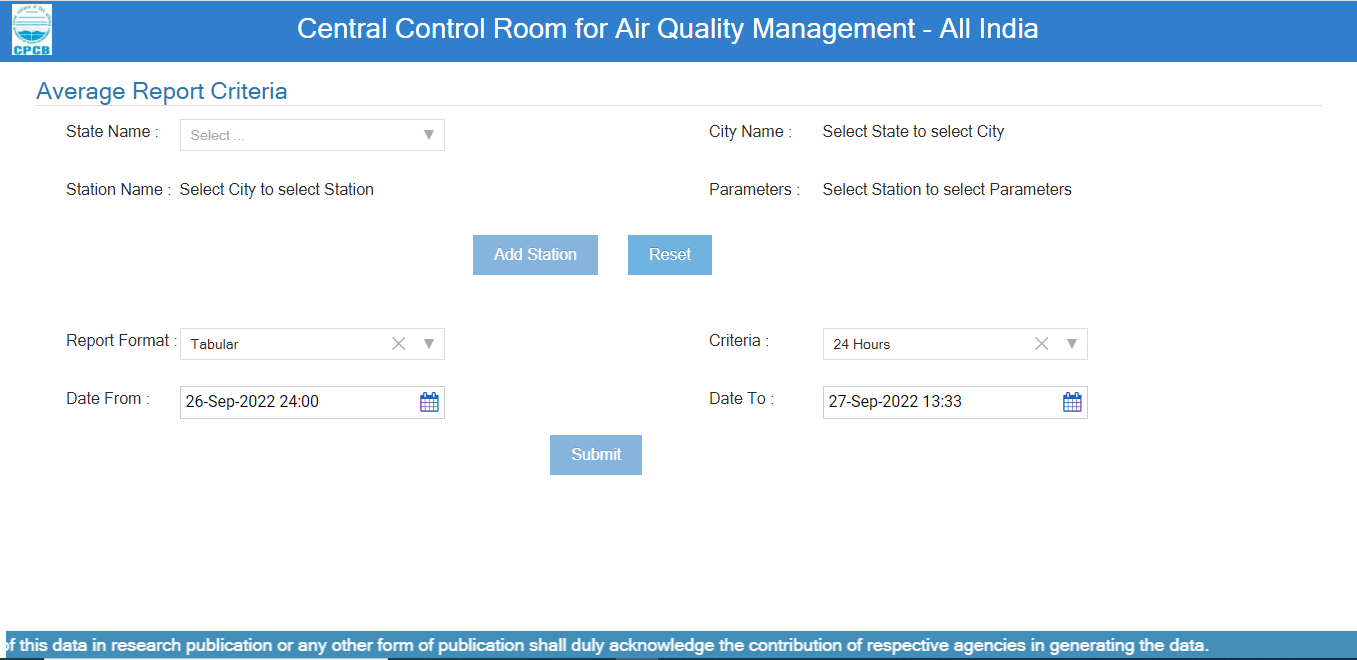






**Proceeding Further**


  1.   State Name --> Select the State
  2.   City Name --> Select the city
  3.   Station Name --> Select **'Select All'**
  4.   Parameter --> Select PM10 
  5.   click on **Add Station**
  6.   Report Format  --> Tabluar
  7.   Criteria  --> 24 Hours
  8.   Date From --> Select the From Date (Suggested to Choose 1st January of an Year, 24.00 Hours)
  9.   Date To --> Select the To Date (Suggested to Choose 31st January of an Year, 24.00 Hours) 
  10. Click on Submit
  11. The data appears in tabular format. Click on the excel icon at the top-right to download the data
  

***The data shall have only the current and Previous Finanical Year information***
  
---

Okay! Now you have your data download for your city of interest. 

**Important:** Change the downloaded excel file name to the city name and uploaded the same in the file section of the google coloboratory.


**You are good to go!**


**NOTE:** In case of any quiries/bugs identifed, please feel free to write to moorthymnair@yahoo.in/moorthymnair92@gmail.com

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
##Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

**Input 2** - Enter the Start date for analysis, end data for analysis and city name in the below mentioned code chunk

**Note:** City name must be same as the file name containing Air Quality data uploaded in the file sections of google Colab

In [ ]:
##Input the start date; end date and City name
start = input('Input the start date for the analysis in dd-mm-yyyy format')
end = input('Input the end date for the analysis in dd-mm-yyyy format')
city = input('Insert the city name in title case format')

Input the start date for the analysis in dd-mm-yyyy format01-04-2021
Input the end date for the analysis in dd-mm-yyyy format29-03-2023
Insert the city name in title case formatPatna


In [ ]:
##Ideal rows as per the information fed by the user
ideal_rows = (dt.strptime(end, '%d-%m-%Y') - dt.strptime(start, '%d-%m-%Y')).days
ideal_rows

727

In [ ]:
##Read the excel sheet
path = city +'.xlsx'
data = pd.read_excel(path)

##Define the shape
nrows, ncols = data.shape

##Rename the columns
cols = data.iloc[10, ]
stations = cols.values[2:len(cols)].tolist()
column_val = ['Date']
for i in stations:
  column_val.append(i)
data = data.iloc[12:nrows, ]
data = data.iloc[:, np.r_[0,2:ncols]]
data.columns = column_val

data.index = np.arange(0, len(data.index))
data


,Date,DRM Office Danapur Patna - BSPCB,Govt. High School Shikarpur Patna - BSPCB,IGSC Planetarium Complex Patna - BSPCB,Muradpur Patna - BSPCB,Rajbansi Nagar Patna - BSPCB,Samanpura Patna - BSPCB
0,01-01-2021 00:00,360.74,179.58,NaN,216.32,317.85,250.75
1,02-01-2021 00:00,334.74,171.85,NaN,224.11,324.77,302.36
2,03-01-2021 00:00,396.69,215,NaN,302.38,402.24,332.13
3,04-01-2021 00:00,483.71,246.35,NaN,241.29,360.34,367.33
4,05-01-2021 00:00,426.09,221.11,NaN,254.3,346.14,323.25
...,...,...,...,...,...,...,...
814,26-03-2023 00:00,162.51,147.68,NaN,349.67,195.69,248.33
815,27-03-2023 00:00,120.04,125.63,NaN,262.27,174.88,138.15
816,28-03-2023 00:00,181.89,157.7,NaN,340.46,215.06,273.75
817,29-03-2023 00:00,163.02,148.25,NaN,390.9,198.54,282.11


In [ ]:
## The set of code is only applicable for cities with larger number of Monitoring stations (>7)

indexes = data.loc[data['Date']==' ', ].index.tolist()
if len(indexes) >0:
  data_1 = data.iloc[0:ideal_rows+1,:]
  for i in range(0,len(indexes)-1):  
    column_val = data.iloc[indexes[i],1:].tolist()  
    data_2 = data.iloc[np.r_[indexes[i]+2:indexes[i+1]],:]
    data_2 = data_2.iloc[:, np.r_[1:ncols-1]].reset_index()
    data_2.drop(columns = ['index'], inplace=True)
    data_2.columns = column_val
    data_1 = pd.concat([data_1,data_2], axis=1)
  
  ## The last set of stations shall be appended via codes below
  columns = data.iloc[indexes[len(indexes)-1],1:].tolist() 
  data_3 = data.iloc[np.r_[indexes[len(indexes)-1]+2:data.shape[0]],:]
  threshold = data_3.shape[0]
  p = data_3.isnull().sum().reset_index()
  p = p.iloc[1:]
  p.columns = ['Stations', 'Threshold']
  index = p.loc[p['Threshold'] != threshold, ].index.tolist()
  data_3 = data_3.iloc[:,index].reset_index()
  data_3.drop(columns = ['index'], inplace=True)
  data_3.columns = columns[0:len(index)]
  data = pd.concat([data_1,data_3], axis=1)

,Date,DRM Office Danapur Patna - BSPCB,Govt. High School Shikarpur Patna - BSPCB,IGSC Planetarium Complex Patna - BSPCB,Muradpur Patna - BSPCB,Rajbansi Nagar Patna - BSPCB,Samanpura Patna - BSPCB
0,01-01-2021 00:00,360.74,179.58,NaN,216.32,317.85,250.75
1,02-01-2021 00:00,334.74,171.85,NaN,224.11,324.77,302.36
2,03-01-2021 00:00,396.69,215,NaN,302.38,402.24,332.13
3,04-01-2021 00:00,483.71,246.35,NaN,241.29,360.34,367.33
4,05-01-2021 00:00,426.09,221.11,NaN,254.3,346.14,323.25
...,...,...,...,...,...,...,...
814,26-03-2023 00:00,162.51,147.68,NaN,349.67,195.69,248.33
815,27-03-2023 00:00,120.04,125.63,NaN,262.27,174.88,138.15
816,28-03-2023 00:00,181.89,157.7,NaN,340.46,215.06,273.75
817,29-03-2023 00:00,163.02,148.25,NaN,390.9,198.54,282.11


In [ ]:
##Define the date format for the date column in data
data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y %H:%M')

In [ ]:
##Assign the mising value 'none' to np.nan
data = data.replace('None', np.nan)

##Check for missing values
data.isnull().sum()

Date                                            0
DRM Office Danapur  Patna - BSPCB              21
Govt. High School Shikarpur  Patna - BSPCB      0
IGSC Planetarium Complex  Patna - BSPCB       819
Muradpur  Patna - BSPCB                         4
Rajbansi Nagar  Patna - BSPCB                   0
Samanpura  Patna - BSPCB                        1
dtype: int64

In [ ]:
##Develop the dataframe based on the start and end date
start_date = dt.strptime(start, '%d-%m-%Y').strftime('%Y-%m-%d')
end_date = dt.strptime(end, '%d-%m-%Y').strftime('%Y-%m-%d')

In [ ]:
##Develop a datetime series based on start and end value
date_series = pd.date_range(start_date, end_date, freq = 'D')
date_series = pd.DataFrame(date_series)
date_series.columns = ['Date']

,Date
0,2021-04-01
1,2021-04-02
2,2021-04-03
3,2021-04-04
4,2021-04-05
...,...
723,2023-03-25
724,2023-03-26
725,2023-03-27
726,2023-03-28


In [ ]:
##Merge the date_series and data dataframes
data_update = date_series.merge(data, how ='left', on ='Date')
data_update['Avg_PM10'] = data_update.drop(columns =['Date']).mean(axis=1)
data_update = data_update[['Date', 'Avg_PM10']]
data_update['Month'] = data_update['Date'].dt.strftime('%m')
data_update ['Year'] = data_update['Date'].dt.strftime('%Y')

for index, i in data_update.iterrows():
  data_update.loc[index, 'Month_Year'] = i['Month'] + '-'+ i['Year']

,Date,Avg_PM10,Month,Year,Month_Year
0,2021-04-01,190.194,04,2021,04-2021
1,2021-04-02,205.606,04,2021,04-2021
2,2021-04-03,197.188,04,2021,04-2021
3,2021-04-04,192.304,04,2021,04-2021
4,2021-04-05,199.406,04,2021,04-2021
...,...,...,...,...,...
723,2023-03-25,316.092,03,2023,03-2023
724,2023-03-26,220.776,03,2023,03-2023
725,2023-03-27,164.194,03,2023,03-2023
726,2023-03-28,233.772,03,2023,03-2023


In [ ]:
##Compute the Monthly average
Month_Year = pd.DataFrame(data_update['Month_Year'].unique(), columns = ['Month_Year'])
Mean_vals = data_update.groupby(['Month_Year'])['Avg_PM10'].agg(['mean']).round(2).reset_index()

Monthly_avgs = Month_Year.merge(Mean_vals, how = 'left')
result1 = Monthly_avgs ##Result-1

,Month_Year,mean
0,04-2021,194.52
1,05-2021,94.68
2,06-2021,81.81
3,07-2021,58.73
4,08-2021,59.46
5,09-2021,63.15
6,10-2021,117.75
7,11-2021,243.17
8,12-2021,241.87
9,01-2022,234.93


In [ ]:
##Find the average monthly difference in PM10 for Both the FY
year = data_update['Year'].unique()

for i in range(0,len(Monthly_avgs)):
  if i<=11:
    k = int(year[0])+1
    Monthly_avgs.loc[i,'FY'] = '{}-{}'.format(year[0],k)
    Monthly_avgs.loc[i, 'FY_index'] = 'FY1'
  else:
    k = int(year[1])+1
    Monthly_avgs.loc[i,'FY'] = '{}-{}'.format(year[1],k)
    Monthly_avgs.loc[i, 'FY_index'] = 'FY2'

Monthly_avgs['Month'] = Monthly_avgs['Month_Year'].apply(lambda x:x.split('-')[0])

,Month_Year,mean,FY,FY_index,Month
0,04-2021,194.52,2021-2022,FY1,04
1,05-2021,94.68,2021-2022,FY1,05
2,06-2021,81.81,2021-2022,FY1,06
3,07-2021,58.73,2021-2022,FY1,07
4,08-2021,59.46,2021-2022,FY1,08
5,09-2021,63.15,2021-2022,FY1,09
6,10-2021,117.75,2021-2022,FY1,10
7,11-2021,243.17,2021-2022,FY1,11
8,12-2021,241.87,2021-2022,FY1,12
9,01-2022,234.93,2021-2022,FY1,01


In [ ]:
##Assign a Target column for Pivot the dataframe
FY_count = Monthly_avgs['FY_index'].value_counts().values 
k = np.array([np.arange(1,FY_count[0]+1),np.arange(1,FY_count[1]+1)])
j=[]

for i in k:
  for l in i:
    j.append(l)

Monthly_avgs['Target'] = j

,Month_Year,mean,FY,FY_index,Month,Target
0,04-2021,194.52,2021-2022,FY1,04,1
1,05-2021,94.68,2021-2022,FY1,05,2
2,06-2021,81.81,2021-2022,FY1,06,3
3,07-2021,58.73,2021-2022,FY1,07,4
4,08-2021,59.46,2021-2022,FY1,08,5
5,09-2021,63.15,2021-2022,FY1,09,6
6,10-2021,117.75,2021-2022,FY1,10,7
7,11-2021,243.17,2021-2022,FY1,11,8
8,12-2021,241.87,2021-2022,FY1,12,9
9,01-2022,234.93,2021-2022,FY1,01,10


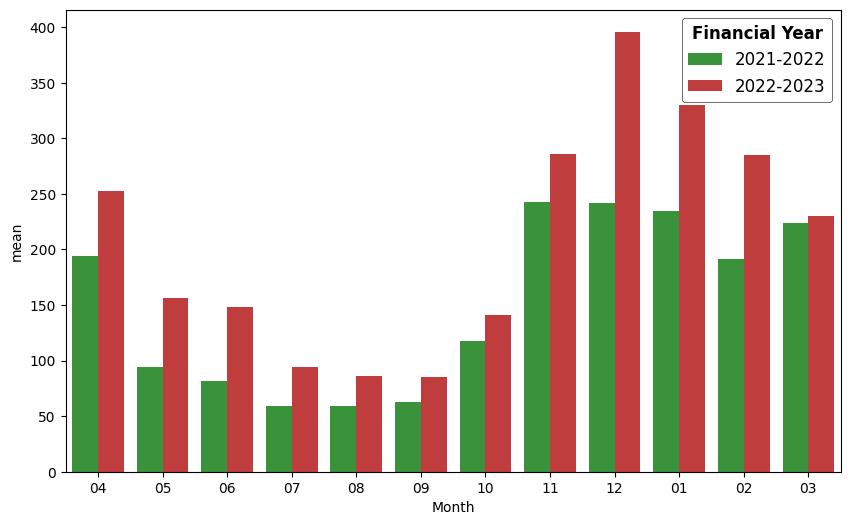

In [ ]:
##Lets try plotting the above result
plt.figure(figsize =(10,6))
palette = ['tab:green', 'tab:red']
sns.barplot(x = 'Month', y ='mean', data = Monthly_avgs, hue='FY', palette = palette)
leg = plt.legend(loc = 'upper right', prop = {'size': 12}, title_fontsize=12)
leg.set_title(title='Financial Year', prop = {'weight' : 'bold', 'size': 12})
leg.get_frame().set_linewidth(0.5)
leg.get_frame().set_edgecolor('black')

In [ ]:
##Pivot to wider
PM10_diff_FY = Monthly_avgs.drop(columns = ['Month_Year']).pivot(index = 'Target',columns =['FY','FY_index'])

##Perform the calculation to assess the monthly average reduction
PM10_diff_FY.index = PM10_diff_FY.iloc[:,2]
PM10_diff_FY = PM10_diff_FY.iloc[:,0:2]
PM10_diff_FY ['Diff'] = np.subtract(PM10_diff_FY.iloc[:,0],PM10_diff_FY.iloc[:,1])
result2 = PM10_diff_FY #Result2

mean              Diff
FY                      2021-2022 2022-2023        
FY_index                      FY1       FY2        
(Month, 2021-2022, FY1)                            
04                         194.52    252.69  -58.17
05                          94.68    155.92  -61.24
06                          81.81    148.11  -66.30
07                          58.73     94.44  -35.71
08                          59.46     86.03  -26.57
09                          63.15     85.28  -22.13
10                         117.75    140.95  -23.20
11                         243.17    286.09  -42.92
12                         241.87    395.96 -154.09
01                         234.93    330.16  -95.23
02                         191.87    284.67  -92.80
03                         223.77    229.83   -6.06

In [ ]:
##Calculate rolling average
data_update = data_update.merge(Monthly_avgs, how='left', on ='Month_Year').drop(columns= ['Month_x','mean', 'Month_y'])

data_update_FY1 = data_update.loc[data_update['FY_index']=='FY1', ]
data_update_FY2 = data_update.loc[data_update['FY_index']=='FY2', ]

data_update_FY1['Rolling_Avg'] = data_update_FY1['Avg_PM10'].expanding().mean().round(2)
data_update_FY2['Rolling_Avg'] = data_update_FY2['Avg_PM10'].expanding().mean().round(2)

##Concat both the dataframes
data_update_rolling = pd.concat([data_update_FY1 ,data_update_FY2], axis=0)

##Find the maximum date for ech month to retreive the rolling average value
max_dates = data_update.groupby(['Month_Year'])['Date'].agg(['max']).reset_index()['max'].apply(lambda x: x.strftime('%Y-%m-%d')).values.tolist()
data_update_rolling = data_update_rolling[data_update_rolling['Date'].isin(max_dates)]

<ipython-input-18-f36c23b72e68>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_update_FY1['Rolling_Avg'] = data_update_FY1['Avg_PM10'].expanding().mean().round(2)
<ipython-input-18-f36c23b72e68>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_update_FY2['Rolling_Avg'] = data_update_FY2['Avg_PM10'].expanding().mean().round(2)


,Date,Avg_PM10,Year,Month_Year,FY,FY_index,Target,Rolling_Avg
29,2021-04-30,132.236,2021,04-2021,2021-2022,FY1,1,194.52
60,2021-05-31,115.290,2021,05-2021,2021-2022,FY1,2,143.78
90,2021-06-30,97.542,2021,06-2021,2021-2022,FY1,3,123.35
121,2021-07-31,43.766,2021,07-2021,2021-2022,FY1,4,106.93
152,2021-08-31,57.780,2021,08-2021,2021-2022,FY1,5,97.31
182,2021-09-30,30.880,2021,09-2021,2021-2022,FY1,6,91.71
213,2021-10-31,158.256,2021,10-2021,2021-2022,FY1,7,95.48
243,2021-11-30,262.720,2021,11-2021,2021-2022,FY1,8,113.64
274,2021-12-31,121.750,2021,12-2021,2021-2022,FY1,9,128.10
305,2022-01-31,312.790,2022,01-2022,2021-2022,FY1,10,138.92


In [ ]:
##Lets re-format to bring out a solid inference
data_update_rolling = Monthly_avgs.merge(data_update_rolling, how='left', on = 'Month_Year', copy= False)
data_update_rolling.drop(columns = ['FY_x','FY_index_x', 'Target_x','mean'], inplace=True)
data_update_rolling = data_update_rolling.drop(columns = ['Month_Year']).pivot(index = 'Target_y',columns =['FY_y','FY_index_y']).drop(columns= ['Date','Avg_PM10','Year'])
data_update_rolling ['Rolling_avg_diff'] = np.subtract(data_update_rolling.iloc[:,2].values.astype(float),data_update_rolling.iloc[:,3].values.astype(float))
result3 = data_update_rolling #result-3

Month           Rolling_Avg           Rolling_avg_diff
FY_y       2021-2022 2022-2023   2021-2022 2022-2023                 
FY_index_y       FY1       FY2         FY1       FY2                 
Target_y                                                             
1                 04        04      194.52    252.69           -58.17
2                 05        05      143.78    203.51           -59.73
3                 06        06      123.35    185.24           -61.89
4                 07        07      106.93    162.17           -55.24
5                 08        08       97.31    146.74           -49.43
6                 09        09       91.71    136.67           -44.96
7                 10        10       95.48    137.29           -41.81
8                 11        11      113.64    155.58           -41.94
9                 12        12      128.10    182.68           -54.58
10                01        01      138.92    197.62           -58.70
11                02        02      143.36    204.92           -61.56
12                03        03      150.19    206.91           -56.72

In [ ]:
##Lets us first add the city for easy interpretation
result1['City'] = city
result2['City'] = city
result3['City'] = city

##Let us save the results. One can download and can have a detailed look into the analytical part
result1.to_excel('observed_monthly_average.xlsx', index=False)
result2.to_excel('Monthly_averaged_diff.xlsx')
result3.to_excel('Cumulative_avg_reduction.xlsx')

In [ ]:
##rearranging the final output as per the format presecribed in PRANA portal
pd.DataFrame({'Month':result1.loc[0:11, 'Month'].apply(lambda x: dt.strptime(str(x), '%m').strftime('%B')), 
              'Observed Monthly Average': result1.loc[12:len(result1), 'mean'].reset_index().drop(columns={'index'}).squeeze(),
              'Monthly average Reduction': result2.reset_index().iloc[0:len(result2), 3],
              'Cumulative average Reduction': result3.reset_index().iloc[0:len(result2), 5],
              'City':city})

,Month,Observed Monthly Average,Monthly average Reduction,Cumulative average Reduction,City
0,April,252.69,-58.17,-58.17,Patna
1,May,155.92,-61.24,-59.73,Patna
2,June,148.11,-66.30,-61.89,Patna
3,July,94.44,-35.71,-55.24,Patna
4,August,86.03,-26.57,-49.43,Patna
5,September,85.28,-22.13,-44.96,Patna
6,October,140.95,-23.20,-41.81,Patna
7,November,286.09,-42.92,-41.94,Patna
8,December,395.96,-154.09,-54.58,Patna
9,January,330.16,-95.23,-58.70,Patna


**Note:** ***The neagtive value shows no improvement and the extent of exacerbation. Instead of entering negative value it is suggested to enter 0 (Zero) in the portal. ***